
# Titanic Challenge





## Modelo de Predição de Sobreviventes do Titanic



In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Dados:
   * PassengerId
   * Survived: 0=Não, 1=Sim
   * Pclass: Classe do Passageiro, 1=Primeira, 2=Segunda, 3=Terceira
   * Name
   * Sex: male, female
   * Age
   * SibSp: # de irmãos e cônjuges a bordo
   * Parch: # de pais e filhos a bordo
   * Ticket: No da Passagem
   * Fare: Tarifa de Passageiro
   * Cabin: No da Cabine
   * Embarked: Porto de Embarque, C=Cherbourg, Q=Queenstown, S=Southampton

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from pandas_profiling import ProfileReport

In [ ]:
!kaggle datasets download -d hienhoangtrong/titatic

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:
profile = ProfileReport(train_data, title="Titanic", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

Nos dados de treino temos alguns dados faltando na coluna de Idades (177 faltando), Cabine (687 faltando) e Embarque (2 faltando).

Nos dados de teste temos alguns dados faltando na coluna de Idades (86 faltando), Tarifa (1 faltando) e Cabine (327 faltando).

Preenchendo os valores Not-a-Number com -1.

In [ ]:
train_without_nan = train_data.fillna(value=-1)
test_without_nan = test_data.fillna(value=-1)

## Tratando os Dados



A partir da média e do desvio padrão podemos chutar valores de idade para eles.
Usando um vetor que recebe um valor aleatório no intervalo
(média - desvio, média + desvio)

In [ ]:
total_data = train_without_nan.append(test_without_nan,ignore_index=True)
# mulheres
media_idade_mulheres = total_data['Age'][(total_data['Age']>=0) & total_data['Sex'].isin(["female"])].mean()
desvio_idade_mulheres = total_data['Age'][(total_data['Age']>=0) & total_data['Sex'].isin(["female"])].std()
qtd_mulheres_sem_idade_train = train_without_nan['Age'][(train_without_nan['Age']==-1) & train_without_nan['Sex'].isin(["female"])].count()
qtd_mulheres_sem_idade_test = test_without_nan['Age'][(test_without_nan['Age']==-1) & test_without_nan['Sex'].isin(["female"])].count()

# homens
media_idade_homens = total_data['Age'][(total_data['Age']>=0) & total_data['Sex'].isin(["male"])].mean()
desvio_idade_homens = total_data['Age'][(total_data['Age']>=0) & total_data['Sex'].isin(["male"])].std()
qtd_homens_sem_idade_train = train_without_nan['Age'][(train_without_nan['Age']==-1) & train_without_nan['Sex'].isin(["male"])].count()
qtd_homens_sem_idade_test = test_without_nan['Age'][(test_without_nan['Age']==-1) & test_without_nan['Sex'].isin(["male"])].count()

In [ ]:
# gerando os vetores com os valores aleatórios que estrarão nas tabelas train e test
valores_aleatorios_mulheres_train = np.random.randint(media_idade_mulheres - desvio_idade_mulheres,
                                                      media_idade_mulheres + desvio_idade_mulheres,
                                                      size=qtd_mulheres_sem_idade_train)

valores_aleatorios_mulheres_test = np.random.randint(media_idade_mulheres - desvio_idade_mulheres,
                                                     media_idade_mulheres + desvio_idade_mulheres,
                                                     size=qtd_mulheres_sem_idade_test)

valores_aleatorios_homens_train = np.random.randint(media_idade_homens - desvio_idade_homens,
                                                    media_idade_homens + desvio_idade_homens,
                                                    size=qtd_homens_sem_idade_train)

valores_aleatorios_homens_test = np.random.randint(media_idade_homens - desvio_idade_homens,
                                                   media_idade_homens + desvio_idade_homens,
                                                   size=qtd_homens_sem_idade_test)

In [ ]:
# substituindo os valores aletórios nas tabelas
index_mulheres_train = np.array(train_without_nan[(train_without_nan['Age']==-1) & train_without_nan['Sex'].isin(["female"])].index)
train_without_nan.loc[index_mulheres_train,['Age']] = valores_aleatorios_mulheres_train

index_mulheres_test = np.array(test_without_nan[(test_without_nan['Age']==-1) & test_without_nan['Sex'].isin(["female"])].index)
test_without_nan.loc[index_mulheres_test,['Age']] = valores_aleatorios_mulheres_test

index_homens_train = np.array(train_without_nan[(train_without_nan['Age']==-1) & train_without_nan['Sex'].isin(["male"])].index)
train_without_nan.loc[index_homens_train,['Age']] = valores_aleatorios_homens_train

index_homens_test = np.array(test_without_nan[(test_without_nan['Age']==-1) & test_without_nan['Sex'].isin(["male"])].index)
test_without_nan.loc[index_homens_test,['Age']] = valores_aleatorios_homens_test

As cabines serão classificadas em
* 0: Não possui Cabine
* 1: Possui Cabine

In [ ]:
train_without_nan.loc[train_without_nan['Cabin']!=-1,'Cabin'] = 1
train_without_nan.loc[train_without_nan['Cabin']==-1,'Cabin'] = 0
test_without_nan.loc[test_without_nan['Cabin']!=-1,'Cabin'] = 1
test_without_nan.loc[test_without_nan['Cabin']==-1,'Cabin'] = 0

In [ ]:
print(train_without_nan[['Embarked','PassengerId']].groupby(['Embarked'],as_index=False).count())

  Embarked  PassengerId
0       -1            2
1        C          168
2        Q           77
3        S          644


Como a grande maioria dos passageiros vieram de Southampton, podemos supor que os dois passageiros sem registro embarcaram do mesmo lugar.

In [ ]:
train_without_nan.loc[train_without_nan['Embarked']==-1,'Embarked'] = 'S'

O último valor vazio vem da tabela de teste no campo de Tarifa (Fare). Como é um único valor, vamos atribuir o valor médio das tarifas.

In [ ]:
soma_tarifa = test_without_nan['Fare'].sum() + train_without_nan['Fare'].sum()
total_passageiros = test_without_nan['Fare'].count() + train_without_nan['Fare'].count()
media_tarifa = soma_tarifa/total_passageiros
test_without_nan.loc[test_without_nan['Fare']==-1,'Fare'] = media_tarifa

Podemos ainda obter outras informações das tabelas como o Tamanho da Família e se a pessoa viaja sozinha.

In [ ]:
train_without_nan['FamilySize'] = train_without_nan['SibSp'] + train_without_nan['Parch']
test_without_nan['FamilySize'] = test_without_nan['SibSp'] + test_without_nan['Parch']

A coluna Alone indica:
* 0: A pessoa não viaja sozinha
* 1: A pessoa viaja sozinha


In [ ]:
train_without_nan['Alone'] = 0
train_without_nan.loc[train_without_nan['FamilySize'] == 0, 'Alone'] = 1
test_without_nan['Alone'] = 0
test_without_nan.loc[test_without_nan['FamilySize'] == 0, 'Alone'] = 1

## Limpando os Dados


Substituir os dados por inteiros para facilitar a análise.

In [ ]:
train_without_nan['Sex'] = train_without_nan['Sex'].map( {'female' : 0, 'male' : 1} ).astype(int)
test_without_nan['Sex'] = test_without_nan['Sex'].map( {'female' : 0, 'male' : 1} ).astype(int)

In [ ]:
train_without_nan['Embarked'] = train_without_nan['Embarked'].map( {'S' : 0, 'C' : 1, 'Q' : 2 } ).astype(int)
test_without_nan['Embarked'] = test_without_nan['Embarked'].map( {'S' : 0, 'C' : 1, 'Q' : 2 } ).astype(int)

In [ ]:
drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

train_clean = train_without_nan.drop(drop, axis=1)
test_clean = test_without_nan.drop(drop, axis=1)

print(train_clean.head())
print(test_clean.head())

   Survived  Pclass  Sex   Age     Fare Cabin  Embarked  FamilySize  Alone
0         0       3    1  22.0   7.2500     0         0           1      0
1         1       1    0  38.0  71.2833     1         1           1      0
2         1       3    0  26.0   7.9250     0         0           0      1
3         1       1    0  35.0  53.1000     1         0           1      0
4         0       3    1  35.0   8.0500     0         0           0      1
   Pclass  Sex   Age     Fare Cabin  Embarked  FamilySize  Alone
0       3    1  34.5   7.8292     0         2           0      1
1       3    0  47.0   7.0000     0         0           1      0
2       2    1  62.0   9.6875     0         2           0      1
3       3    1  27.0   8.6625     0         0           0      1
4       3    0  22.0  12.2875     0         0           2      0


In [ ]:
profile_clean = ProfileReport(train_clean, title="Titanic", html={'style': {'full_width': True}})
profile_clean.to_notebook_iframe()

## Padrões

Alguns padrões a serem explorados
*   Sexo?
*   Classe?
*   Idade?
*   Tamanho da Família? (SibSp + Parch)
*   Cabine? (alguns estavam sem cabine, pode ter relação com a sobrevivência?)
*   Porto de Embarque?



In [ ]:
print(train_clean.groupby('Sex')[['Survived']].mean())

     Survived
Sex          
0    0.742038
1    0.188908



74% das mulheres sobreviveram

In [ ]:
print(train_clean.groupby('Pclass')[['Survived']].mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


62% da Primeira Classe sobreviveu

In [ ]:
print(train_clean.pivot_table('Survived', index='Sex',columns='Pclass'))

Pclass         1         2         3
Sex                                 
0       0.968085  0.921053  0.500000
1       0.368852  0.157407  0.135447


*   96% das mulheres da Primeira Classe sobreviveram
*   92% das mulheres da Segunda Classe sobreviveram
*   50% das mulheres da Terceira Classe sobreviveram
*   Homens tinham pouca chance de sobreviver, mas se fossem da Primeira Classe tinham o dobro de chance



In [ ]:
age = pd.cut(train_clean['Age'],[0,20,40,60,80])
train_clean.pivot_table('Survived',['Sex',age],'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 20]   0.941176  1.000000  0.540984
    (20, 40]  0.980000  0.913043  0.528571
    (40, 60]  0.960000  0.846154  0.083333
    (60, 80]  1.000000       NaN  1.000000
1   (0, 20]   0.400000  0.500000  0.206897
    (20, 40]  0.433333  0.076923  0.120370
    (40, 60]  0.350000  0.050000  0.075000
    (60, 80]  0.083333  0.333333  0.000000

A menor taxa de sobrevivência se encontra na faixa de 40 - 60 anos da Terceira Classe. Enquanto entre os homens está entre 20 - 60 da Segunda Classe e 40 - 80 da Terceira Classe.

In [ ]:
print(train_clean.groupby('Alone')[['Survived']].mean())

       Survived
Alone          
0      0.505650
1      0.303538


Se a pessoa estava viajando sozinha ela tinha uma menor chance de sobrevivência.

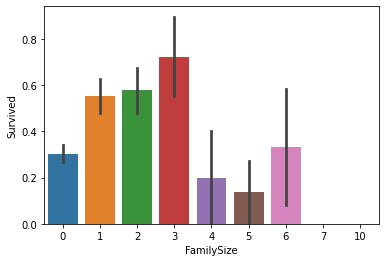

In [ ]:
sns.barplot(x='FamilySize',y='Survived',data=train_clean)

Pessoas com famílias entre 1 e 4 integrantes tinham maior chance de sobrevivência.

In [ ]:
fare = pd.cut(train_clean['Fare'],50)
train_clean.pivot_table('Survived',[fare],'Pclass')

Pclass                     1         2         3
Fare                                            
(-0.512, 10.247]    0.000000  0.000000  0.206154
(10.247, 20.493]         NaN  0.428571  0.416667
(20.493, 30.74]     0.520833  0.568966  0.219512
(30.74, 40.986]     0.411765  0.666667  0.142857
(40.986, 51.233]    0.285714  0.666667  0.000000
(51.233, 61.48]     0.687500       NaN  0.714286
(61.48, 71.726]     0.666667  1.000000  0.000000
(71.726, 81.973]    0.750000  0.000000       NaN
(81.973, 92.219]    0.833333       NaN       NaN
(92.219, 102.466]   1.000000       NaN       NaN
(102.466, 112.712]  0.625000       NaN       NaN
(112.712, 122.959]  0.857143       NaN       NaN
(133.206, 143.452]  0.857143       NaN       NaN
(143.452, 153.699]  0.666667       NaN       NaN
(163.945, 174.192]  1.000000       NaN       NaN
(204.932, 215.178]  0.750000       NaN       NaN
(215.178, 225.425]  0.000000       NaN       NaN
(225.425, 235.671]  0.750000       NaN       NaN
(245.918, 256.165]  0.500000       NaN       NaN
(256.165, 266.411]  0.666667       NaN       NaN
(502.083, 512.329]  1.000000       NaN       NaN

Pessoas que pagaram acima de 50 em suas passagens tinha mais chance de sobreviver.

In [ ]:
train_clean.groupby('Cabin')[['Survived']].mean()

Survived
Cabin          
0      0.299854
1      0.666667

Pessoas com cabine tinham uma maior chance de sobreviver.

In [ ]:
train_clean.groupby('Embarked')[['Survived']].mean()

Survived
Embarked          
0         0.339009
1         0.553571
2         0.389610

Quem embarcou em Queenstown e Southampton tinham uma menor chance de sobreviver.

## Classificação

Separando os dados de treino para começar a aplicar nos algoritmos de classificação.

In [ ]:
from sklearn.model_selection import train_test_split

# Separando entre variável independente X e dependente Y
X = train_clean.iloc[0::, 1::].values
Y = train_clean.iloc[0::,0].values

# Separando em 70% para treinamento e 30% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =0)

Treinando os Modelos

In [ ]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)

# KNC Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,Y_train)

# SVC Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_svm = SVC(kernel='linear',random_state=0).fit(X_train,Y_train)

# SVC Kernel SVM Algorithm
svc_ksa = SVC(random_state=0).fit(X_train,Y_train)

# GaussianNB Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB().fit(X_train, Y_train)

# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train,Y_train)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0).fit(X_train,Y_train)

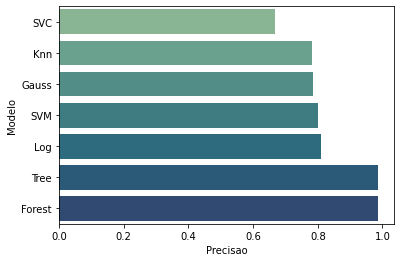

In [ ]:
# Verificando a Precisão dos Modelos
from pandas import DataFrame

score_train = DataFrame([['Log','Knn','SVM','SVC','Gauss','Tree','Forest'],
                  [log.score(X_train,Y_train), knn.score(X_train,Y_train), svc_svm.score(X_train,Y_train),
                   svc_ksa.score(X_train,Y_train), gauss.score(X_train,Y_train), tree.score(X_train,Y_train), forest.score(X_train,Y_train)]]
                  ).transpose()
score_train.columns = ['Modelo','Precisao']

sns.barplot(x='Precisao',y='Modelo',data=score_train.sort_values(by='Precisao'), palette="crest")

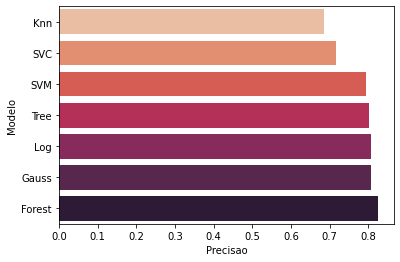

In [ ]:
# Aplicando ao modelo de teste

score_test = DataFrame([['Log','Knn','SVM','SVC','Gauss','Tree','Forest'],
                  [log.score(X_test,Y_test), knn.score(X_test,Y_test), svc_svm.score(X_test,Y_test),
                   svc_ksa.score(X_test,Y_test), gauss.score(X_test,Y_test), tree.score(X_test,Y_test), forest.score(X_test,Y_test)]]
                  ).transpose()
score_test.columns = ['Modelo','Precisao']
sns.barplot(x='Precisao',y='Modelo',data=score_test.sort_values(by='Precisao'), palette="rocket_r")

O Modelo Random Forest Classification obteve a maior precisão tanto no treino quanto no teste. Vamos utilizá-lo para fazer a predição

In [ ]:
test_clean.iloc[0::, 1::]

Sex   Age      Fare Cabin  Embarked  FamilySize  Alone
0      1  34.5    7.8292     0         2           0      1
1      0  47.0    7.0000     0         0           1      0
2      1  62.0    9.6875     0         2           0      1
3      1  27.0    8.6625     0         0           0      1
4      0  22.0   12.2875     0         0           2      0
..   ...   ...       ...   ...       ...         ...    ...
413    1  39.0    8.0500     0         0           0      1
414    0  39.0  108.9000     1         1           0      1
415    1  38.5    7.2500     0         0           0      1
416    1  20.0    8.0500     0         0           0      1
417    1  38.0   22.3583     0         1           2      0

[418 rows x 7 columns]

In [ ]:
forest_test = RandomForestClassifier(random_state=0).fit(X,Y)
predict_forest = forest_test.predict(test_clean)
resultado_forest = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_forest})
resultado_forest.to_csv('resultado_forest.csv', index = False)

In [ ]:
tree_test = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X,Y)
predict_tree = tree_test.predict(test_clean)
resultado_tree= pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_tree})
resultado_tree.to_csv('resultado_tree.csv', index = False)

In [ ]:
gauss_test = GaussianNB().fit(X,Y)
predict_gauss = gauss_test.predict(test_clean)
resultado_gauss = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_gauss})
resultado_gauss.to_csv('resultado_gauss.csv', index = False)

In [ ]:
svc_test = SVC(random_state=0).fit(X,Y)
predict_svc = svc_test.predict(test_clean)
resultado_svc = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_svc})
resultado_svc.to_csv('resultado_svc.csv', index = False)

In [ ]:
svm_test = SVC(kernel='linear',random_state=0).fit(X,Y)
predict_svm = svm_test.predict(test_clean)
resultado_svm = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_svm})
resultado_svm.to_csv('resultado_svm.csv', index = False)

In [ ]:
knn_test = KNeighborsClassifier().fit(X,Y)
predict_knn = knn_test.predict(test_clean)
resultado_knn = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_knn})
resultado_knn.to_csv('resultado_knn.csv', index = False)

In [ ]:
log_test = LogisticRegression(random_state=0, max_iter=10000).fit(X,Y)
predict_log = log_test.predict(test_clean)
resultado_log = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_log})
resultado_log.to_csv('resultado_log.csv', index = False)

Novo resultado utilizando RandomizedSearchCV da biblioteca do scikit-learn.
Ele utiliza validação cruzada para maximizar o resultado do teste.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_forest = RandomForestClassifier(random_state=0)

In [ ]:
# Parâmetros que serão tentados na validação cruzada tentando encontrar os que fornecem um melhor resultado.
random_grid = {'criterion': ['gini', 'entropy'],
               'bootstrap': [True, False],
               'max_depth': [3, 5, 7, 9, 11, 13, 16, 19, 20],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [5, 10, 15, 20, 25],
               'min_samples_split': [40, 50, 60, 62, 64, 66, 68],
               'n_estimators': [300, 600, 900, 1200, 1500, 1800]}

In [ ]:
random_forest_cv = RandomizedSearchCV(estimator=random_forest, param_distributions=random_grid, n_iter=100)

In [ ]:
random_forest_cv.fit(X_train,Y_train)
random_forest_best = random_forest_cv.best_estimator_
random_forest_best.fit(X,Y)
predict_rf = random_forest_best.predict(test_clean)
resultado_rf = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predict_rf})
resultado_rf.to_csv('resultado_rf.csv', index = False)

In [ ]:
random_forest_cv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 68,
 'n_estimators': 1500}